In [ ]:
import pandas as pd

In [ ]:
# Carga del archivo Excel
from google.colab import files
#uploaded = files.upload()

# Lectura del archivo
df = pd.read_excel("limpioML.xlsx")

# Visualización inicial

#COCHABAMBA



Estadístico ADF: -0.6071006063238847
p-valor: 0.869369495109599
La serie NO es estacionaria (probablemente requiere diferenciación).
Tamaño entrenamiento: 252
Tamaño prueba: 12
Buscando mejores parámetros...

Mejores parámetros encontrados: (0, 1, 2, 1, 1, 1)
Menor AIC: 4969.22


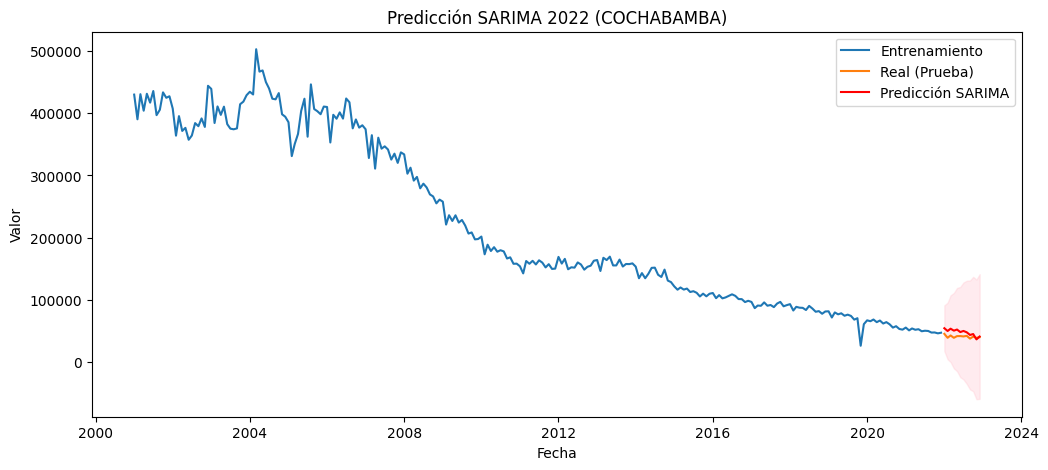

MAE: 7268.50
RMSE: 8018.61
R²: -15.0560


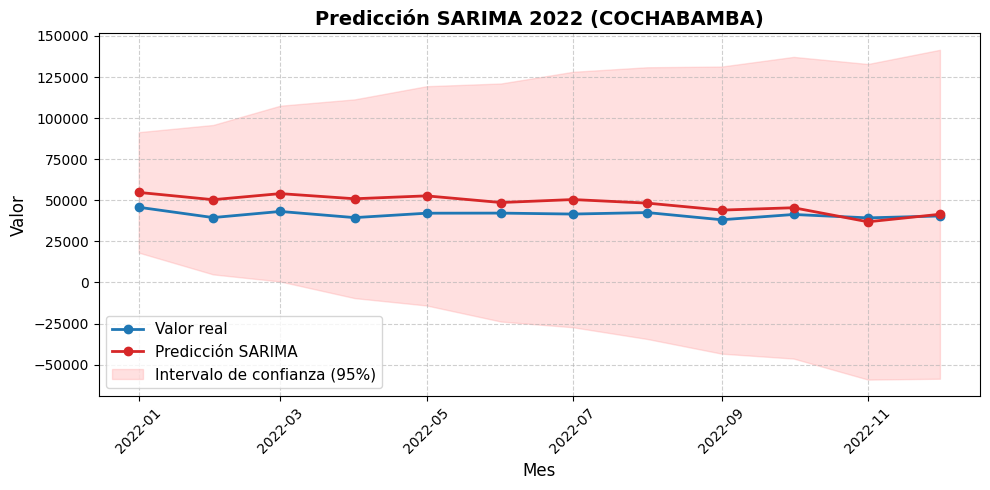

In [ ]:
# ============================================
# 1️⃣ Instalación e importación de librerías
# ============================================
!pip install statsmodels pandas matplotlib --quiet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

# ============================================
# 2️⃣ Cargar los dato#s
# ============================================
# Asegúrate de cambiar el nombre del archivo por el tuyo
#df = pd.read_csv("tu_archivo.csv")

# Crear la columna fecha a partir de Anhos y Mes
df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

# Seleccionar departamento para prediccion (COCHABAMBA)
serie = df[['Fecha', 'COCHABAMBA']].copy()
serie.set_index('Fecha', inplace=True)
serie = serie.asfreq('MS')  # frecuencia mensual

# ============================================
# 3️⃣ Comprobación de estacionariedad (ADF)
# ============================================
resultado_adf = adfuller(serie['COCHABAMBA'])
print("Estadístico ADF:", resultado_adf[0])
print("p-valor:", resultado_adf[1])
if resultado_adf[1] > 0.05:
    print("La serie NO es estacionaria (probablemente requiere diferenciación).")
else:
    print("La serie es estacionaria.")

# ============================================
# 4️⃣ Separar en entrenamiento y prueba
# ============================================
train = serie[:-12]  # hasta diciembre 2019
test = serie[-12:]   # desde enero 2020 hasta diciembre 2022

print("Tamaño entrenamiento:", len(train))
print("Tamaño prueba:", len(test))

# ============================================
# 5️⃣ Búsqueda manual de parámetros SARIMA
# ============================================
# Definir rangos
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # estacionalidad mensual

param_combinations = list(itertools.product(p, d, q, P, D, Q))
mejor_aic = np.inf
mejores_param = None
mejor_modelo = None

print("Buscando mejores parámetros...")

for (p_, d_, q_, P_, D_, Q_) in param_combinations:
    try:
        modelo = SARIMAX(train,
                         order=(p_, d_, q_),
                         seasonal_order=(P_, D_, Q_, s),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit(disp=False)
        aic = modelo.aic
        if aic < mejor_aic:
            mejor_aic = aic
            mejores_param = (p_, d_, q_, P_, D_, Q_)
            mejor_modelo = modelo
    except Exception:
        continue

print(f"\nMejores parámetros encontrados: {mejores_param}")
print(f"Menor AIC: {mejor_aic:.2f}")

# ============================================
# 6️⃣ Predicciones y evaluación
# ============================================
predicciones = mejor_modelo.get_forecast(steps=len(test)) # Predict for the length of the test set
pred_mean = predicciones.predicted_mean
pred_ci = predicciones.conf_int()

# ============================================
# 7️⃣ Visualización
# ============================================
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real (Prueba)')
plt.plot(pred_mean.index, pred_mean, label='Predicción SARIMA', color='red')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("Predicción SARIMA 2022 (COCHABAMBA)") # Updated title
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

# ============================================
# 8️⃣ Métricas de error
# ============================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, pred_mean)
rmse = np.sqrt(mean_squared_error(test, pred_mean))
r2 = r2_score(test, pred_mean)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# ============================================
# 🔹 Gráfico enfocado solo en la predicción
# ============================================
plt.figure(figsize=(10,5))
plt.plot(test.index, test, marker='o', label='Valor real', color='#1f77b4', linewidth=2)
plt.plot(pred_mean.index, pred_mean, marker='o', label='Predicción SARIMA', color='#d62728', linewidth=2)

# Relleno del intervalo de confianza
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='#ff9999', alpha=0.3, label='Intervalo de confianza (95%)')

# Estilo y etiquetas
plt.title("Predicción SARIMA 2022 (COCHABAMBA)", fontsize=14, fontweight='bold') # Updated title
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# SANTA CRUZ

Estadístico ADF: -1.8317196679663654
p-valor: 0.36483131129230295
La serie NO es estacionaria (probablemente requiere diferenciación).
Tamaño entrenamiento: 252
Tamaño prueba: 12
Buscando mejores parámetros...

Mejores parámetros encontrados: (2, 2, 2, 0, 1, 1)
Menor AIC: 5181.05


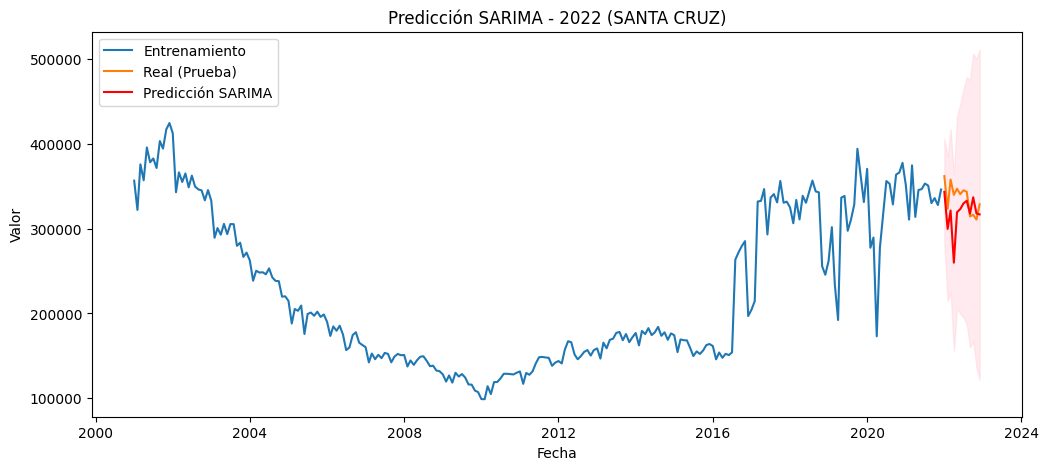

MAE: 22775.03
RMSE: 29856.71
R²: -2.3857


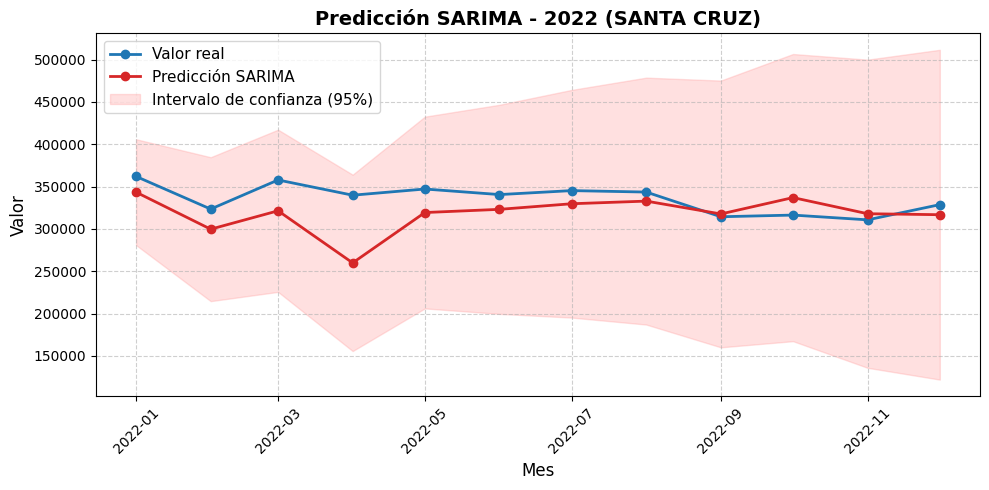

In [ ]:
# ============================================
# 1️⃣ Instalación e importación de librerías
# ============================================
!pip install statsmodels pandas matplotlib --quiet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

# ============================================
# 2️⃣ Cargar los dato#s
# ============================================
# Asegúrate de cambiar el nombre del archivo por el tuyo
#df = pd.read_csv("tu_archivo.csv")

# Crear la columna fecha a partir de Anhos y Mes
df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

# Seleccionar departamento para prediccion (SANTA CRUZ)
serie = df[['Fecha', 'SANTA CRUZ']].copy()
serie.set_index('Fecha', inplace=True)
serie = serie.asfreq('MS')  # frecuencia mensual

# ============================================
# 3️⃣ Comprobación de estacionariedad (ADF)
# ============================================
resultado_adf = adfuller(serie['SANTA CRUZ'])
print("Estadístico ADF:", resultado_adf[0])
print("p-valor:", resultado_adf[1])
if resultado_adf[1] > 0.05:
    print("La serie NO es estacionaria (probablemente requiere diferenciación).")
else:
    print("La serie es estacionaria.")

# ============================================
# 4️⃣ Separar en entrenamiento y prueba
# ============================================
train = serie[:-12]  # HASTA 2021
test = serie[-12:]   # 2022

print("Tamaño entrenamiento:", len(train))
print("Tamaño prueba:", len(test))

# ============================================
# 5️⃣ Búsqueda manual de parámetros SARIMA
# ============================================
# Definir rangos
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # estacionalidad mensual

param_combinations = list(itertools.product(p, d, q, P, D, Q))
mejor_aic = np.inf
mejores_param = None
mejor_modelo = None

print("Buscando mejores parámetros...")

for (p_, d_, q_, P_, D_, Q_) in param_combinations:
    try:
        modelo = SARIMAX(train,
                         order=(p_, d_, q_),
                         seasonal_order=(P_, D_, Q_, s),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit(disp=False)
        aic = modelo.aic
        if aic < mejor_aic:
            mejor_aic = aic
            mejores_param = (p_, d_, q_, P_, D_, Q_)
            mejor_modelo = modelo
    except Exception:
        continue

print(f"\nMejores parámetros encontrados: {mejores_param}")
print(f"Menor AIC: {mejor_aic:.2f}")

# ============================================
# 6️⃣ Predicciones y evaluación
# ============================================
predicciones = mejor_modelo.get_forecast(steps=len(test)) # Changed steps to the length of the test set
pred_mean = predicciones.predicted_mean
pred_ci = predicciones.conf_int()

# ============================================
# 7️⃣ Visualización
# ============================================
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real (Prueba)')
plt.plot(pred_mean.index, pred_mean, label='Predicción SARIMA', color='red')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("Predicción SARIMA - 2022 (SANTA CRUZ)") # Updated title
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

# ============================================
# 8️⃣ Métricas de error
# ============================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate metrics on the full 12 months of the test set
mae = mean_absolute_error(test, pred_mean) # Used full test set
rmse = np.sqrt(mean_squared_error(test, pred_mean)) # Used full test set
r2 = r2_score(test, pred_mean) # Used full test set

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# ============================================
# 🔹 Gráfico enfocado solo en la predicción
# ============================================
plt.figure(figsize=(10,5))
plt.plot(test.index, test, marker='o', label='Valor real', color='#1f77b4', linewidth=2) # Used full test set
plt.plot(pred_mean.index, pred_mean, marker='o', label='Predicción SARIMA', color='#d62728', linewidth=2)

# Relleno del intervalo de confianza
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='#ff9999', alpha=0.3, label='Intervalo de confianza (95%)')

# Estilo y etiquetas
plt.title("Predicción SARIMA - 2022 (SANTA CRUZ)", fontsize=14, fontweight='bold') # Updated title
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

#TARIJA

Estadístico ADF: -1.9098432762198083
p-valor: 0.32744478599695515
La serie NO es estacionaria (probablemente requiere diferenciación).
Tamaño entrenamiento: 252
Tamaño prueba: 12
Buscando mejores parámetros...

Mejores parámetros encontrados: (2, 1, 2, 0, 1, 1)
Menor AIC: 5543.57


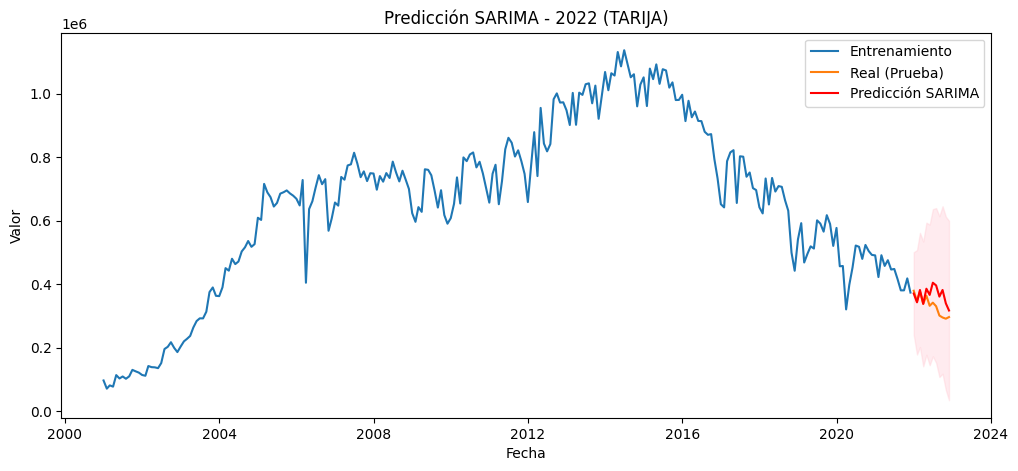

MAE: 34671.03
RMSE: 44547.19
R²: -1.1956


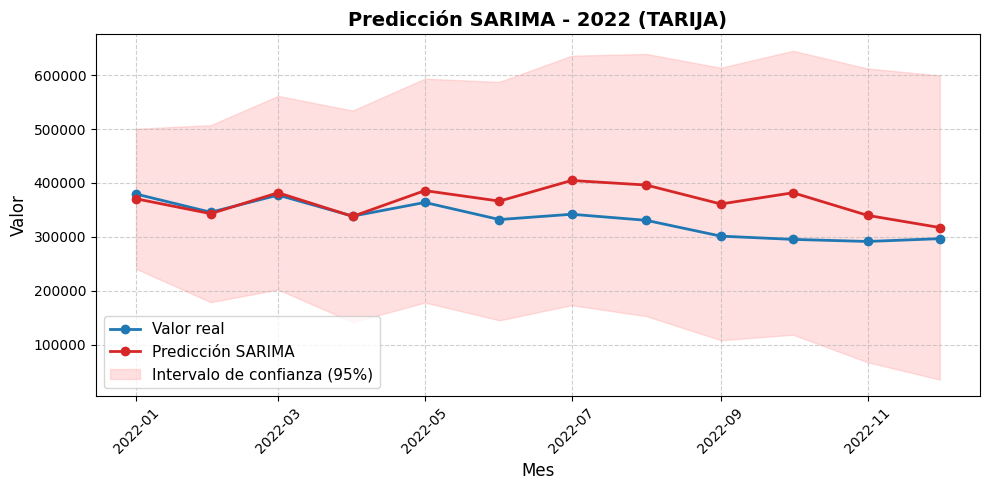

In [ ]:
# ============================================
# 1️⃣ Instalación e importación de librerías
# ============================================
# Assuming libraries are already installed from previous cells,
# but keeping this for self-containment if needed.
# !pip install statsmodels pandas matplotlib --quiet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

# ============================================
# 2️⃣ Cargar los datos y preparar la serie
# ============================================
# Dataframe df is already loaded in previous cells.
# Asegúrate de que la columna Fecha ya fue creada
if 'Fecha' not in df.columns:
    df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

# Seleccionar departamento para prediccion (TARIJA)
serie = df[['Fecha', 'TARIJA']].copy()
serie.set_index('Fecha', inplace=True)
serie = serie.asfreq('MS')  # frecuencia mensual

# ============================================
# 3️⃣ Comprobación de estacionariedad (ADF)
# ============================================
resultado_adf = adfuller(serie['TARIJA'])
print("Estadístico ADF:", resultado_adf[0])
print("p-valor:", resultado_adf[1])
if resultado_adf[1] > 0.05:
    print("La serie NO es estacionaria (probablemente requiere diferenciación).")
else:
    print("La serie es estacionaria.")

# ============================================
# 4️⃣ Separar en entrenamiento y prueba
# ============================================
# Predict the last year (2022)
train = serie[:-12]  # up to 2020
test = serie[-12:]   # 2021 and 2022

print("Tamaño entrenamiento:", len(train))
print("Tamaño prueba:", len(test))

# ============================================
# 5️⃣ Búsqueda manual de parámetros SARIMA
# ============================================
# Definir rangos
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # estacionalidad mensual

param_combinations = list(itertools.product(p, d, q, P, D, Q))
mejor_aic = np.inf
mejores_param = None
mejor_modelo = None

print("Buscando mejores parámetros...")

for (p_, d_, q_, P_, D_, Q_) in param_combinations:
    try:
        modelo = SARIMAX(train,
                         order=(p_, d_, q_),
                         seasonal_order=(P_, D_, Q_, s),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit(disp=False)
        aic = modelo.aic
        if aic < mejor_aic:
            mejor_aic = aic
            mejores_param = (p_, d_, q_, P_, D_, Q_)
            mejor_modelo = modelo
    except Exception:
        continue

print(f"\nMejores parámetros encontrados: {mejores_param}")
print(f"Menor AIC: {mejor_aic:.2f}")

# ============================================
# 6️⃣ Predicciones y evaluación
# ============================================
predicciones = mejor_modelo.get_forecast(steps=len(test)) # Predict for the length of the test set
pred_mean = predicciones.predicted_mean
pred_ci = predicciones.conf_int()

# ============================================
# 7️⃣ Visualización
# ============================================
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real (Prueba)')
plt.plot(pred_mean.index, pred_mean, label='Predicción SARIMA', color='red')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("Predicción SARIMA - 2022 (TARIJA)") # Updated title
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

# ============================================
# 8️⃣ Métricas de error
# ============================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate metrics on the full 12 months of the test set
mae = mean_absolute_error(test, pred_mean)
rmse = np.sqrt(mean_squared_error(test, pred_mean))
r2 = r2_score(test, pred_mean)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# ============================================
# 🔹 Gráfico enfocado solo en la predicción
# ============================================
plt.figure(figsize=(10,5))
plt.plot(test.index, test, marker='o', label='Valor real', color='#1f77b4', linewidth=2)
plt.plot(pred_mean.index, pred_mean, marker='o', label='Predicción SARIMA', color='#d62728', linewidth=2)

# Relleno del intervalo de confianza
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='#ff9999', alpha=0.3, label='Intervalo de confianza (95%)')

# Estilo y etiquetas
plt.title("Predicción SARIMA - 2022 (TARIJA)", fontsize=14, fontweight='bold') # Updated title
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

#CHUQUISACA


Estadístico ADF: -1.293455223959616
p-valor: 0.6321612120197607
La serie NO es estacionaria (probablemente requiere diferenciación).
Tamaño entrenamiento: 252
Tamaño prueba: 12
Buscando mejores parámetros...

Mejores parámetros encontrados: (2, 1, 2, 0, 1, 1)
Menor AIC: 4931.28


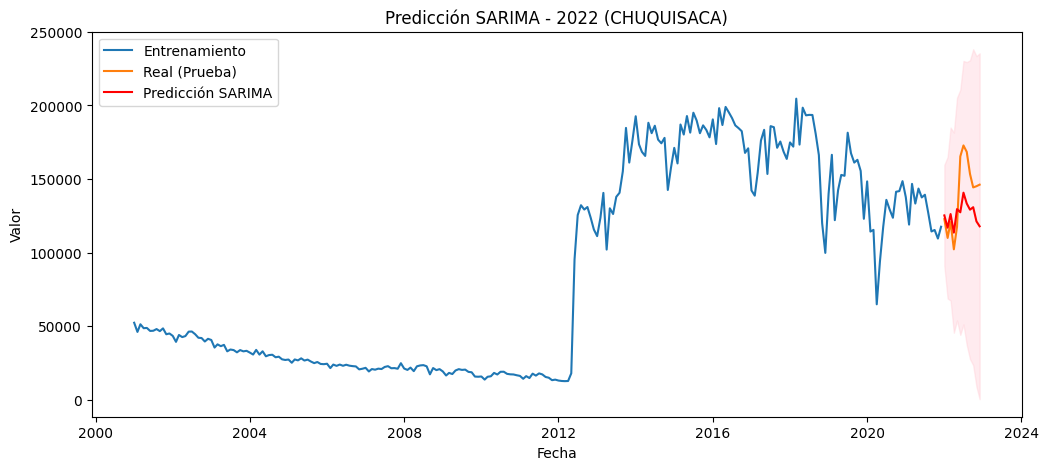

MAE: 19419.96
RMSE: 22707.36
R²: 0.0132


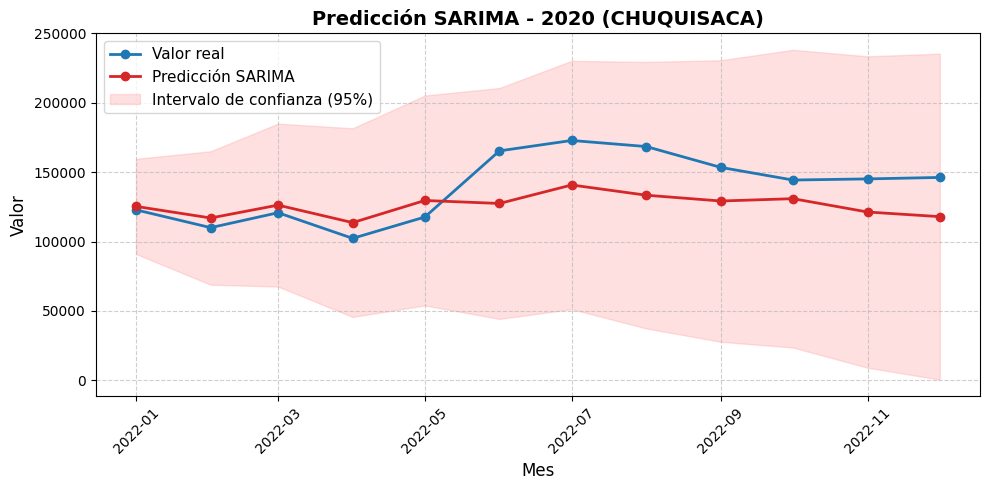

In [ ]:
# ============================================
# 1️⃣ Instalación e importación de librerías
# ============================================
# Assuming libraries are already installed from previous cells,
# but keeping this for self-containment if needed.
# !pip install statsmodels pandas matplotlib --quiet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

# ============================================
# 2️⃣ Cargar los datos y preparar la serie
# ============================================
# Dataframe df is already loaded in previous cells.
# Asegúrate de que la columna Fecha ya fue creada
if 'Fecha' not in df.columns:
    df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

# Seleccionar departamento para prediccion (CHUQUISACA)
serie = df[['Fecha', 'CHUQUISACA']].copy()
serie.set_index('Fecha', inplace=True)
serie = serie.asfreq('MS')  # frecuencia mensual

# ============================================
# 3️⃣ Comprobación de estacionariedad (ADF)
# ============================================
resultado_adf = adfuller(serie['CHUQUISACA'])
print("Estadístico ADF:", resultado_adf[0])
print("p-valor:", resultado_adf[1])
if resultado_adf[1] > 0.05:
    print("La serie NO es estacionaria (probablemente requiere diferenciación).")
else:
    print("La serie es estacionaria.")

# ============================================
# 4️⃣ Separar en entrenamiento y prueba
# ============================================
# Predict the last year (2022)
train = serie[:-12]  # up to 2021
test = serie[-12:]   # year 2022

print("Tamaño entrenamiento:", len(train))
print("Tamaño prueba:", len(test))

# ============================================
# 5️⃣ Búsqueda manual de parámetros SARIMA
# ============================================
# Definir rangos
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # estacionalidad mensual

param_combinations = list(itertools.product(p, d, q, P, D, Q))
mejor_aic = np.inf
mejores_param = None
mejor_modelo = None

print("Buscando mejores parámetros...")

for (p_, d_, q_, P_, D_, Q_) in param_combinations:
    try:
        modelo = SARIMAX(train,
                         order=(p_, d_, q_),
                         seasonal_order=(P_, D_, Q_, s),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit(disp=False)
        aic = modelo.aic
        if aic < mejor_aic:
            mejor_aic = aic
            mejores_param = (p_, d_, q_, P_, D_, Q_)
            mejor_modelo = modelo
    except Exception:
        continue

print(f"\nMejores parámetros encontrados: {mejores_param}")
print(f"Menor AIC: {mejor_aic:.2f}")

# ============================================
# 6️⃣ Predicciones y evaluación
# ============================================
predicciones = mejor_modelo.get_forecast(steps=len(test)) # Predict 12 steps for the year 2022
pred_mean = predicciones.predicted_mean
pred_ci = predicciones.conf_int()

# ============================================
# 7️⃣ Visualización
# ============================================
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real (Prueba)')
plt.plot(pred_mean.index, pred_mean, label='Predicción SARIMA', color='red')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("Predicción SARIMA - 2022 (CHUQUISACA)") # Updated title
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

# ============================================
# 8️⃣ Métricas de error
# ============================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate metrics on the full 12 months of the test set
mae = mean_absolute_error(test, pred_mean)
rmse = np.sqrt(mean_squared_error(test, pred_mean))
r2 = r2_score(test, pred_mean)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# ============================================
# 🔹 Gráfico enfocado solo en la predicción
# ============================================
plt.figure(figsize=(10,5))
plt.plot(test.index, test, marker='o', label='Valor real', color='#1f77b4', linewidth=2)
plt.plot(pred_mean.index, pred_mean, marker='o', label='Predicción SARIMA', color='#d62728', linewidth=2)

# Relleno del intervalo de confianza
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='#ff9999', alpha=0.3, label='Intervalo de confianza (95%)')

# Estilo y etiquetas
plt.title("Predicción SARIMA - 2020 (CHUQUISACA)", fontsize=14, fontweight='bold') # Updated title
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()